In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [42]:
df=pd.read_csv('housing.csv')
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [43]:
df=df.iloc[:500]
df.shape

(500, 10)

In [44]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        2
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

c:\Users\anipr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anipr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anipr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


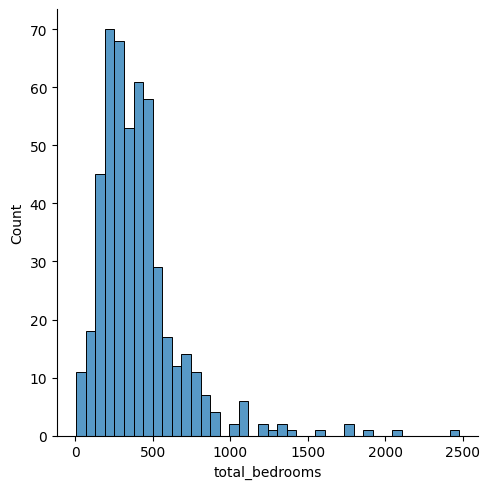

In [45]:
sns.displot(df.total_bedrooms)

In [46]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace=True)

In [47]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [48]:
X=df.drop(columns=['median_house_value','ocean_proximity'],axis=1)
Y=df['median_house_value']

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)


In [53]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
280,-122.18,37.80,34.0,1355.0,195.0,442.0,195.0,6.2838
190,-122.24,37.79,52.0,674.0,180.0,647.0,168.0,3.3750
103,-122.25,37.81,52.0,2155.0,701.0,895.0,613.0,2.5795
201,-122.22,37.78,50.0,1920.0,530.0,1525.0,477.0,1.4886
402,-122.27,37.90,42.0,1650.0,274.0,645.0,256.0,5.6228
...,...,...,...,...,...,...,...,...
440,-122.30,37.88,46.0,1647.0,376.0,854.0,355.0,2.9000
131,-122.19,37.84,18.0,1617.0,210.0,533.0,194.0,11.6017
249,-122.22,37.78,44.0,1678.0,514.0,1700.0,495.0,2.0801
152,-122.23,37.80,52.0,2033.0,486.0,787.0,459.0,3.1603


In [50]:
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [51]:
predictions=reg.predict(X_train)

In [52]:
# pickle file
pickle.dump(LinearRegression,open("model.pkl","wb"))